#### 3. Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 4.	Use the `%matplotlib inline` magic command so that your plots show in the notebook _without_ having to call `plt.show()` every time.

In [2]:
%matplotlib inline

#### 5.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows = 6868)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


In [182]:
gdp_df.tail()

,Country,Year,GDP_Per_Capita
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094
6867,Zimbabwe,1990,3324.348171


#### 6. Repeat for the internet use dataset. Call this DataFrame `internet_df`. Take a look at the first six rows.

In [5]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


I was getting this error for #6:

ParserError: Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6

After some googling, I decided the easiest thing was to delete the relevant lines in the data file because the issue was with the footnote lines which we aren't going to use anyway. Essentially, when reading in a csv, it looks at how many columns there are in the first row, and expects that many columns all the way down. The error above indicates that there are linew with more columns than that (in this case, 6 instead of 4), and it doesn't know what to do with that.

#### Addendum:
Chris referenced needing to find a method that allows us to just read in up to a certain row in the csv file we want to use. I found the method that is now in place above. I redownloaded the data for internet usage so that the csv would be complete, but just read in the relevant lines needed.

In [6]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#### 98. Look at the shape of each DataFrame - how many rows? How many columns?

In [7]:
gdp_df.shape

(6868, 4)

gdp_df has 6868 rows and 4 columns

In [8]:
internet_df.shape

(4495, 4)

internet_df has 4495rows and 4 columns

#### 6.	Take a look at the datatypes for the columns in each DataFrame.

In [9]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

gdp_df

Country or Area = object

Year = int64

Value = float64

Value Footnotes = float64

In [10]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

internet_df

Country or Area = object

Year = int64

Value = float64

Value Footnotes = float64

#### 99. Take a look at the last 10 rows of each DataFrame in turn.

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#### 7.	Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.

In [13]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [14]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

#### 8.	Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [15]:
gdp_df = gdp_df.rename(columns = { 'Country or Area' : 'Country',
                                   'Value' : 'GDP_Per_Capita'})
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

#### 9.	Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [16]:
internet_df = internet_df.rename(columns = { 'Country or Area' : 'Country',
                                             'Value' : 'Internet_Users_Pct'})
internet_df.columns

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')

#### 10.	Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`.
#### 11.	Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [17]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df)
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
1,Afghanistan,2013,2116.465454,5.900000
2,Afghanistan,2012,2075.491747,5.454545
3,Afghanistan,2011,1904.559799,5.000000
4,Afghanistan,2010,1957.029338,4.000000


#### 12.	Look at the last five rows to make sure the data is clean and as expected.

In [18]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3453,Zimbabwe,1997,3580.048793,0.033080
3454,Zimbabwe,1996,3520.430146,0.016790
3455,Zimbabwe,1995,3226.413930,0.007684
3456,Zimbabwe,1994,3263.934978,0.001739
3457,Zimbabwe,1990,3324.348171,0.000000


#### Notes to self re. pd.merge()

It seems, in this case, no further arguments were necessary, the two columns with the same name in each dataframe were used as the columns to merge upon. Here is more info on the merge function:
Pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects −

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True)

Here, we have used the following parameters −

left − A DataFrame object.

right − Another DataFrame object.

on − Columns (names) to join on. Must be found in both the left and right DataFrame objects.

left_on − Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.

right_on − Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.

left_index − If True, use the index (row labels) from the left DataFrame as its join key(s). In case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame.

right_index − Same usage as left_index for the right DataFrame.

how − One of 'left', 'right', 'outer', 'inner'. Defaults to inner. Each method has been described below.

sort − Sort the result DataFrame by the join keys in lexicographical order. Defaults to True, setting to False will improve the performance substantially in many cases.

#### Examples:
print pd.merge(left,right,on=['id','subject_id'])

SO below is a more explicit version of the merge that doesn't rely on trusting the correct columns to be matched upon:

pd.merge(gdp_df, internet_df, on = ['Country', 'Year'])


#### 13.	Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.
I played with three different ways to do this
1. Using .query and a reference to an external list
2. Using .isin (learned that you don't actually need .loc here]
3. Creating a boolean series to use as a filter via .isin then applying the filter to the dataframe

In [19]:
year_list = [2004, 2009, 2014]
gdp_internet_limited = gdp_and_internet_use.query('Year in @year_list')
gdp_internet_limited

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
5,Afghanistan,2009,1758.904043,3.550000
10,Afghanistan,2004,1200.278256,0.105809
13,Albania,2014,11623.866679,60.100000
18,Albania,2009,10346.864199,41.200000
...,...,...,...,...
3419,Zambia,2009,2917.516220,6.310000
3424,Zambia,2004,2261.766537,2.013550
3436,Zimbabwe,2014,2955.240287,19.890000
3441,Zimbabwe,2009,1925.364381,11.360000


In [20]:
gdp_internet_ltd = gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])]
gdp_internet_ltd

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
5,Afghanistan,2009,1758.904043,3.550000
10,Afghanistan,2004,1200.278256,0.105809
13,Albania,2014,11623.866679,60.100000
18,Albania,2009,10346.864199,41.200000
...,...,...,...,...
3419,Zambia,2009,2917.516220,6.310000
3424,Zambia,2004,2261.766537,2.013550
3436,Zimbabwe,2014,2955.240287,19.890000
3441,Zimbabwe,2009,1925.364381,11.360000


In [21]:
year_filter = gdp_and_internet_use['Year'].isin([2004, 2009, 2014])
g_i_ltd_again = gdp_and_internet_use[year_filter]
g_i_ltd_again

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
5,Afghanistan,2009,1758.904043,3.550000
10,Afghanistan,2004,1200.278256,0.105809
13,Albania,2014,11623.866679,60.100000
18,Albania,2009,10346.864199,41.200000
...,...,...,...,...
3419,Zambia,2009,2917.516220,6.310000
3424,Zambia,2004,2261.766537,2.013550
3436,Zimbabwe,2014,2955.240287,19.890000
3441,Zimbabwe,2009,1925.364381,11.360000


#### 14.	Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.
Played with a couple of different ways here too

In [22]:
gi_2004 = gdp_internet_ltd[gdp_internet_ltd['Year'] == 2004]
gi_2004

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2004,1200.278256,0.105809
23,Albania,2004,7604.838002,2.420388
44,Algeria,2004,10058.435939,4.634475
66,Angola,2004,5593.241537,0.464815
86,Antigua and Barbuda,2004,18745.681534,24.266544
...,...,...,...,...
3361,Uruguay,2004,12479.966871,17.063098
3383,Uzbekistan,2004,3221.189333,2.593725
3404,Vanuatu,2004,2792.356252,4.746603
3424,Zambia,2004,2261.766537,2.013550


In [23]:
gi_2009 = gdp_internet_ltd.query('Year == 2009')
gi_2009

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2009,1758.904043,3.550000
18,Albania,2009,10346.864199,41.200000
39,Algeria,2009,10782.361398,11.230000
61,Angola,2009,7643.493749,6.000000
81,Antigua and Barbuda,2009,20046.839017,42.000000
...,...,...,...,...
3356,Uruguay,2009,16477.823860,41.800000
3378,Uzbekistan,2009,4446.863606,17.058216
3399,Vanuatu,2009,3270.529800,7.500000
3419,Zambia,2009,2917.516220,6.310000


In [24]:
gi_2014 = gdp_internet_ltd.query('Year == 2014')
gi_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.39
13,Albania,2014,11623.866679,60.10
34,Algeria,2014,11512.705405,18.09
56,Angola,2014,8239.828837,21.26
76,Antigua and Barbuda,2014,18104.241470,64.00
...,...,...,...,...
3351,Uruguay,2014,20582.168953,61.46
3373,Uzbekistan,2014,5764.492705,43.55
3394,Vanuatu,2014,3116.077025,18.80
3414,Zambia,2014,3450.046561,17.34


#### 15.	Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).
#### 16.	Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [25]:
gi_2014 = gi_2014.sort_values(by = 'Internet_Users_Pct', ascending = False)
gi_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1381,Iceland,2014,49652.149500,98.16
372,Bermuda,2014,77361.104881,96.80
2296,Norway,2014,62589.373548,96.30
854,Denmark,2014,52214.537753,95.99
1798,Luxembourg,2014,108760.916030,94.67
...,...,...,...,...
2122,Myanmar,2014,4020.037369,2.10
2256,Niger,2014,1127.615541,1.95
1261,Guinea,2014,2061.760973,1.72
540,Burundi,2014,886.235777,1.38


Iceland had the highest percentage of internet users in 2014 with 98.16%
Timor-Leste had the lowest percentage of internet users in 2014 with 1.14%

#### 17.	Repeat for 2004 and 2009.

In [26]:
gi_2004 = gi_2004.sort_values(by = 'Internet_Users_Pct', ascending = False)
gi_2004

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2985,Sweden,2004,44496.023401,83.890000
1391,Iceland,2004,45145.545658,83.880000
864,Denmark,2004,50607.628971,80.930000
2306,Norway,2004,60893.410993,77.690000
1063,Finland,2004,43760.279146,72.390000
...,...,...,...,...
1019,Ethiopia,2004,793.093786,0.155335
10,Afghanistan,2004,1200.278256,0.105809
3035,Tajikistan,2004,1737.743630,0.077480
1759,Liberia,2004,1181.546158,0.031011


In 2004, Sweden had the highest with 83.89% and Myanmar the lowest with 0.024%

In [27]:
gi_2009 = gi_2009.sort_values(by = 'Internet_Users_Pct', ascending = False)
gi_2009

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1386,Iceland,2009,48177.084123,93.000000
2301,Norway,2009,61886.564498,92.080000
2980,Sweden,2009,45638.035577,91.000000
2190,Netherlands,2009,51772.424928,89.630000
1803,Luxembourg,2009,104932.811953,87.310000
...,...,...,...,...
1014,Ethiopia,2009,1150.206179,0.540000
570,Cambodia,2009,2603.583778,0.530000
2733,Sierra Leone,2009,1372.392285,0.260000
2127,Myanmar,2009,2874.780227,0.220000


In 2009 Iceland had the highest with 93% and Timor-Leste the lowest with 0.185%

#### 18.	Which country had the highest gdp per capita in 2014? What was the gdp per capita?
#### 20.	Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [28]:
gi_2014 = gi_2014.sort_values(by = 'GDP_Per_Capita', ascending = False)
gi_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1798,Luxembourg,2014,108760.916030,94.67
2542,Qatar,2014,95578.416973,91.49
2751,Singapore,2014,87808.663157,82.00
372,Bermuda,2014,77361.104881,96.80
627,Cayman Islands,2014,66207.447230,74.10
...,...,...,...,...
3098,Togo,2014,1404.132938,5.70
2102,Mozambique,2014,1217.090210,5.94
2256,Niger,2014,1127.615541,1.95
1842,Malawi,2014,1027.208496,5.83


In 2014, Luxembourg had the higest GDP per capita at 108,760.92 and Burundi had the lowest at 886.24

#### 21.	Create some scatterplots:  
    a.  2004 Percent Using the Internet vs GDP Per Capita  
    b.	2009 Percent Using the Internet vs GDP Per Capita  
    c.	2014 Percent Using the Internet vs GDP Per Capita  

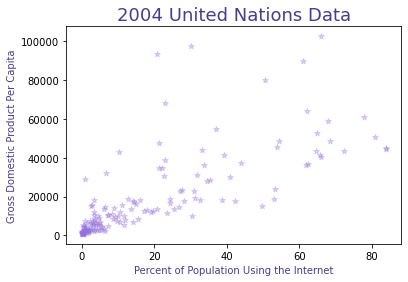

In [30]:
plt.scatter(gi_2004['Internet_Users_Pct'], gi_2004['GDP_Per_Capita'], 
            color = 'MediumPurple',
            marker = '*',
            alpha = 0.3)
plt.xlabel('Percent of Population Using the Internet', color = 'DarkSlateBlue')
plt.ylabel('Gross Domestic Product Per Capita', color = 'DarkSlateBlue')
plt.title('2004 United Nations Data', fontsize = 18, color = 'DarkSlateBlue');

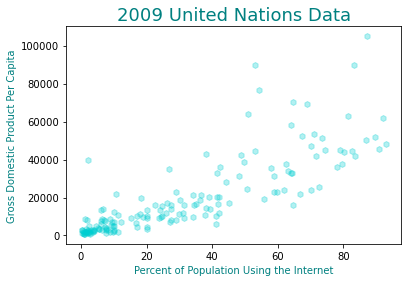

In [31]:
plt.scatter(gi_2009['Internet_Users_Pct'], gi_2009['GDP_Per_Capita'], 
            color = 'DarkTurquoise',
            marker = 'h',
            alpha = 0.3)
plt.xlabel('Percent of Population Using the Internet', color = 'Teal')
plt.ylabel('Gross Domestic Product Per Capita', color = 'Teal')
plt.title('2009 United Nations Data', fontsize = 18, color = 'Teal');

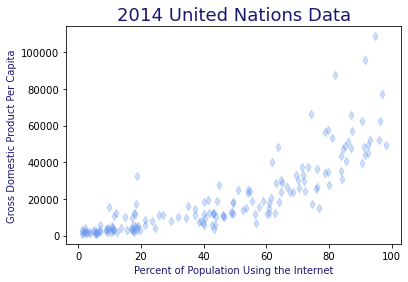

In [32]:
plt.scatter(gi_2014['Internet_Users_Pct'], gi_2014['GDP_Per_Capita'], 
            color = 'CornflowerBlue',
            marker = 'd',
            alpha = 0.3)
plt.xlabel('Percent of Population Using the Internet', color = 'MidnightBlue')
plt.ylabel('Gross Domestic Product Per Capita', color = 'MidnightBlue')
plt.title('2014 United Nations Data', fontsize = 18, color = 'MidnightBlue');

#### 22.	Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

The scatter lessens as the years go on towards what looks to my eye like an exponential pattern such that wealthier nations very clearly have higher levels of internet use among their populations. The concentration of lower GDP nations with low internet usage continues, but it's not as tight of a cluster as the years go on.

#### 23.	Look at the distribution of gdp per capita values for 2014. Is it unimodal?

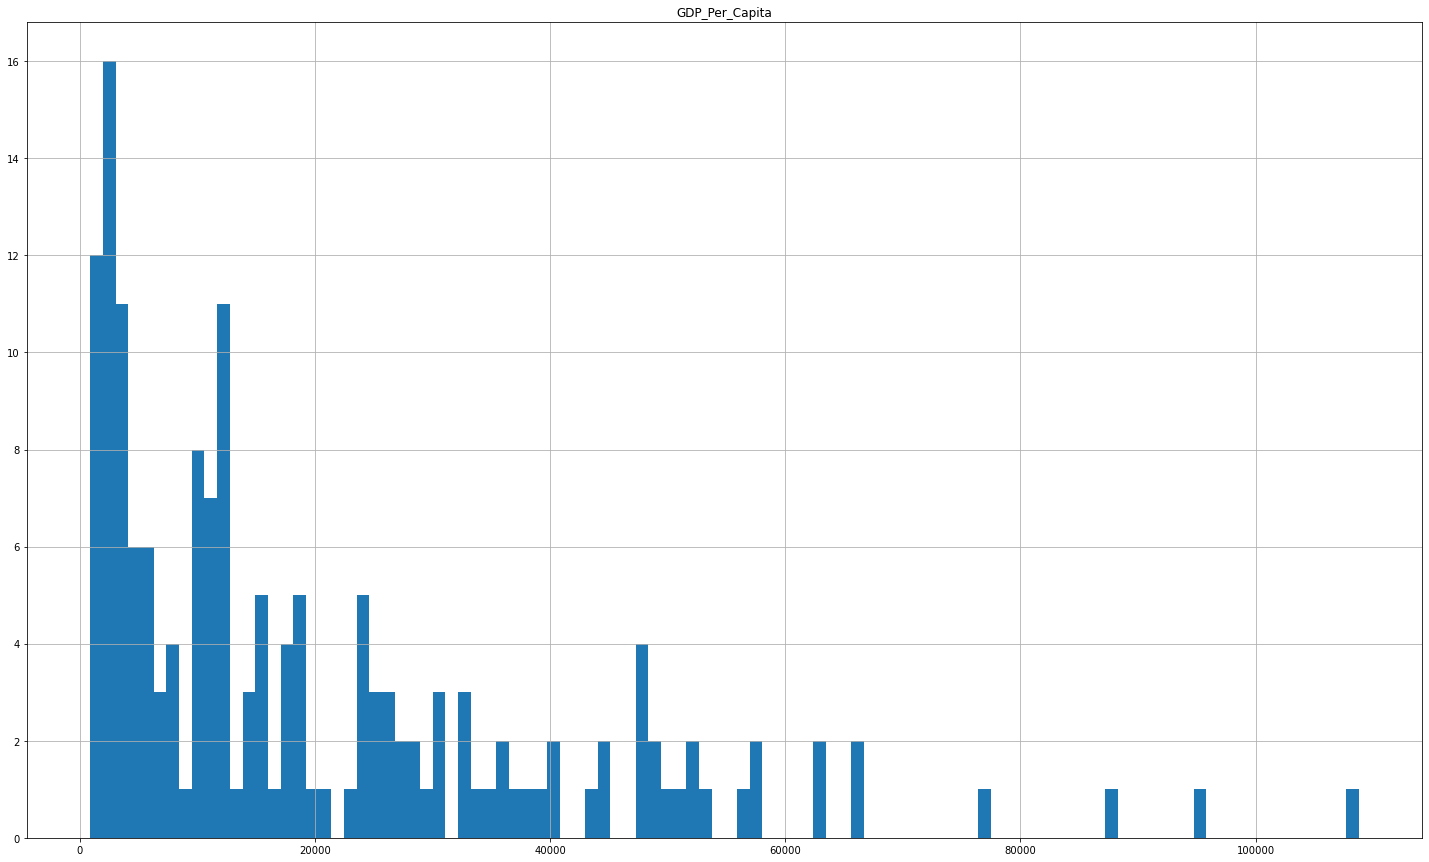

In [34]:
gi_2014.hist(column = 'GDP_Per_Capita', bins = 100, figsize = (25, 15));

gi_2014.mode(numeric_only = True)

In [36]:
gi_2014['GDP_Per_Capita'].sort_values()

540        886.235777
1842      1027.208496
2256      1127.615541
2102      1217.090210
3098      1404.132938
            ...      
627      66207.447230
372      77361.104881
2751     87808.663157
2542     95578.416973
1798    108760.916030
Name: GDP_Per_Capita, Length: 163, dtype: float64

No, there is no value that occurs twice, but the data is pretty heavily skewed with a large cluster at the low end of gdp

#### 24.	Look at the distribution of Internet Use for 2014. Is it unimodal?

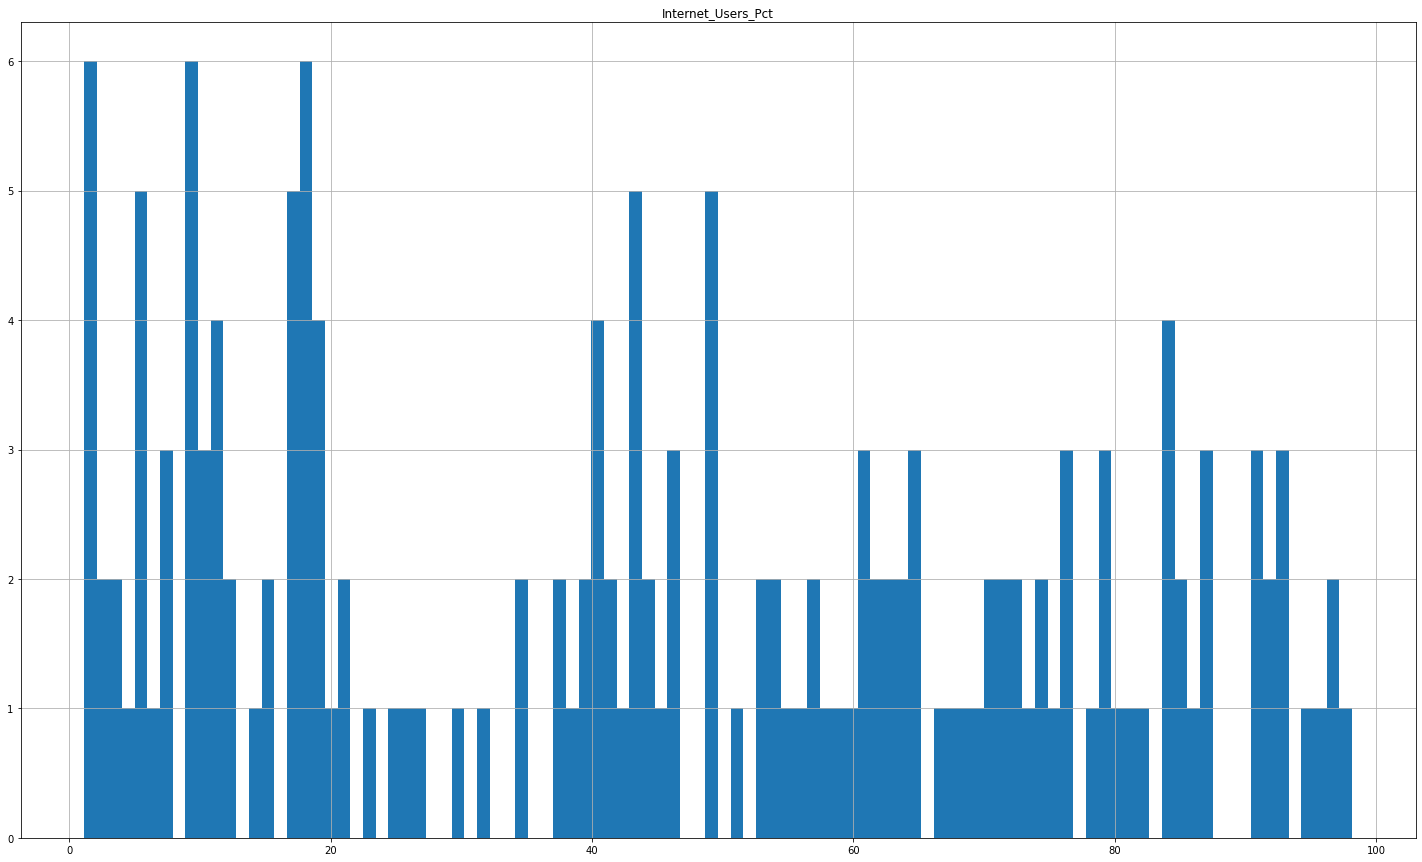

In [38]:
gi_2014.hist(column = 'Internet_Users_Pct', bins = 100, figsize = (25, 15));

In [39]:
gi_2014['Internet_Users_Pct'].value_counts().head(20)

43.40    2
43.00    2
11.00    2
2.10     2
61.00    2
9.00     2
39.02    1
40.50    1
21.26    1
29.70    1
23.40    1
39.69    1
38.70    1
17.14    1
56.80    1
40.00    1
21.20    1
43.55    1
7.11     1
42.68    1
Name: Internet_Users_Pct, dtype: int64

It is not unimodal, there are 6 values that each appear twice: 
43.40    2
43.00    2
11.00    2
2.10     2
61.00    2
9.00     2

#### 25.	What are the top 5 countries in terms of internet use in 2014?

In [40]:
gi_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1381,Iceland,2014,49652.149500,98.16
372,Bermuda,2014,77361.104881,96.80
2296,Norway,2014,62589.373548,96.30
854,Denmark,2014,52214.537753,95.99
1798,Luxembourg,2014,108760.916030,94.67


Iceland, Bermuda, Norway, Denmark, Luxembourg

#### Create a DataFrame called top_5_internet **from the combined DataFrame that has all three years _for the 5 countries that had the greatest 2014 internet usage_**. You should have 15 rows. Check that this is true.

In [41]:
top_5_countries = ['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Luxembourg']
top_5_internet = gdp_internet_ltd.query('Country in @top_5_countries')
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
372,Bermuda,2014,77361.104881,96.800000
377,Bermuda,2009,89961.982744,83.250000
382,Bermuda,2004,90195.811033,60.990867
854,Denmark,2014,52214.537753,95.990000
859,Denmark,2009,50274.075696,86.840000
864,Denmark,2004,50607.628971,80.930000
1381,Iceland,2014,49652.149500,98.160000
1386,Iceland,2009,48177.084123,93.000000
1391,Iceland,2004,45145.545658,83.880000
1798,Luxembourg,2014,108760.916030,94.670000


#### 27.	Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

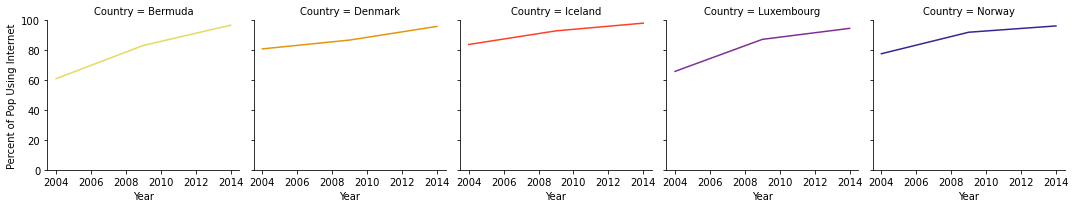

In [42]:
ti = sns.FacetGrid(top_5_internet, col="Country", hue="Country", palette = 'CMRmap_r')
ti.map_dataframe(sns.lineplot, x="Year", y="Internet_Users_Pct")
ti.set_axis_labels("Year", "Percent of Pop Using Internet")
ti.set(ylim=(0, 100));

Bermuda had the greatest growth from 2004 to 2014

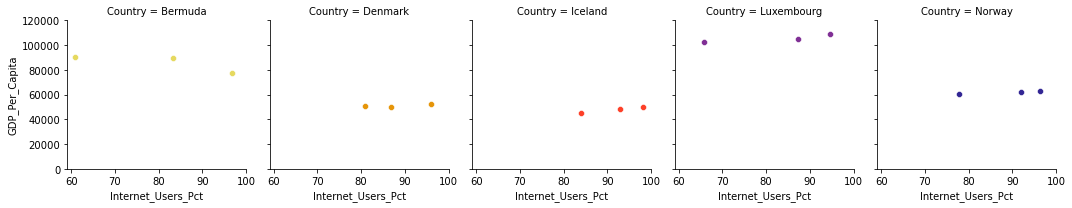

In [43]:
tis = sns.FacetGrid(top_5_internet, col="Country", hue="Country", palette = 'CMRmap_r')
tis.map_dataframe(sns.scatterplot, x="Internet_Users_Pct", y="GDP_Per_Capita")
tis.set(ylim=(0, 120000));

#### 27.	28.	Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [45]:
gi_2014.sort_values(by = 'Internet_Users_Pct').head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3087,Timor-Leste,2014,3264.568070,1.14
540,Burundi,2014,886.235777,1.38
1261,Guinea,2014,2061.760973,1.72
2256,Niger,2014,1127.615541,1.95
2728,Sierra Leone,2014,1997.511853,2.10


In [46]:
low_5_countries = ['Timor-Leste', 'Burundi', 'Guinea', 'Niger', 'Sierra Leone']
lowest_5_internet = gdp_internet_ltd.query('Country in @low_5_countries')
lowest_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
540,Burundi,2014,886.235777,1.380000
545,Burundi,2009,831.564131,0.900000
550,Burundi,2004,817.460585,0.349060
1261,Guinea,2014,2061.760973,1.720000
1266,Guinea,2009,1825.576637,0.940000
1271,Guinea,2004,1778.079082,0.508819
2256,Niger,2014,1127.615541,1.950000
2261,Niger,2009,992.409977,0.760000
2266,Niger,2004,929.883920,0.189934
2728,Sierra Leone,2014,1997.511853,2.100000


In [47]:
internet_df[internet_df['Country'] == 'Timor-Leste']

,Country,Year,Internet_Users_Pct
4019,Timor-Leste,2014,1.140000
4020,Timor-Leste,2013,1.100000
4021,Timor-Leste,2012,0.914700
4022,Timor-Leste,2011,0.900000
4023,Timor-Leste,2010,0.210000
4024,Timor-Leste,2009,0.185252
4025,Timor-Leste,2008,0.163877
4026,Timor-Leste,2007,0.140959
4027,Timor-Leste,2006,0.116628
4028,Timor-Leste,2005,0.099032


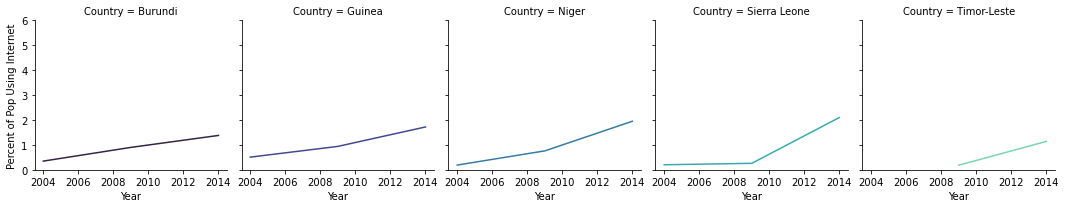

In [48]:
li = sns.FacetGrid(lowest_5_internet, col="Country", hue="Country", palette = 'mako')
li.map_dataframe(sns.lineplot, x="Year", y="Internet_Users_Pct")
li.set_axis_labels("Year", "Percent of Pop Using Internet")
li.set(ylim=(0, 6));

Timor-Leste has consistently been the lowest. It's worth noting that there was no data for 2003 or 2004 or from 1991 through 2001.

#### 29.	Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [49]:
gi_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1798,Luxembourg,2014,108760.916030,94.67
2542,Qatar,2014,95578.416973,91.49
2751,Singapore,2014,87808.663157,82.00
372,Bermuda,2014,77361.104881,96.80
627,Cayman Islands,2014,66207.447230,74.10


In [50]:
top_5_gcountries = ['Luxembourg', 'Qatar', 'Singapore', 'Bermuda', 'Cayman Islands']
top_5_gdp = gdp_internet_ltd.query('Country in @top_5_gcountries')
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
372,Bermuda,2014,77361.104881,96.800000
377,Bermuda,2009,89961.982744,83.250000
382,Bermuda,2004,90195.811033,60.990867
627,Cayman Islands,2014,66207.447230,74.100000
632,Cayman Islands,2009,70300.334857,64.500000
1798,Luxembourg,2014,108760.916030,94.670000
1803,Luxembourg,2009,104932.811953,87.310000
1808,Luxembourg,2004,102708.212547,65.880000
2542,Qatar,2014,95578.416973,91.490000
2547,Qatar,2009,89954.519993,53.100000


In [51]:
gdp_df[gdp_df['Country'] == 'Cayman Islands']

,Country,Year,GDP_Per_Capita
1029,Cayman Islands,2018,71549.339553
1030,Cayman Islands,2017,69572.496853
1031,Cayman Islands,2016,68355.719823
1032,Cayman Islands,2015,67116.934370
1033,Cayman Islands,2014,66207.447230
1034,Cayman Islands,2013,65481.144902
1035,Cayman Islands,2012,65722.105781
1036,Cayman Islands,2011,66135.176554
1037,Cayman Islands,2010,66762.065858
1038,Cayman Islands,2009,70300.334857


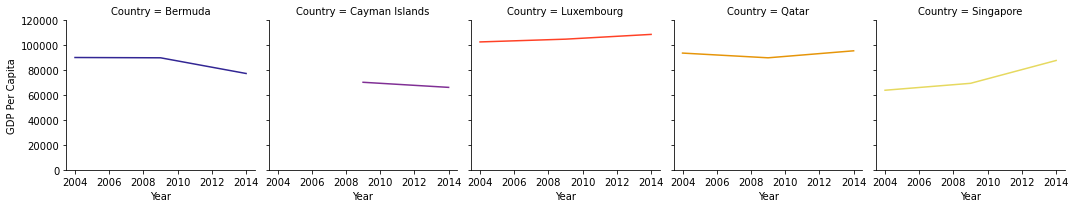

In [52]:
tg = sns.FacetGrid(top_5_gdp, col="Country", hue="Country", palette = 'CMRmap')
tg.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")
tg.set_axis_labels("Year", "GDP Per Capita")
tg.set(ylim=(0, 120000));

#### 96. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [53]:
gi_2014.sort_values(by = 'GDP_Per_Capita').head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
540,Burundi,2014,886.235777,1.38
1842,Malawi,2014,1027.208496,5.83
2256,Niger,2014,1127.615541,1.95
2102,Mozambique,2014,1217.090210,5.94
3098,Togo,2014,1404.132938,5.70


In [54]:
low_5_gcountries = ['Burundi', 'Malawi', 'Niger', 'Mozambique', 'Togo']
lowest_5_gdp = gdp_internet_ltd.query('Country in @low_5_gcountries')
lowest_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
540,Burundi,2014,886.235777,1.380000
545,Burundi,2009,831.564131,0.900000
550,Burundi,2004,817.460585,0.349060
1842,Malawi,2014,1027.208496,5.830000
1847,Malawi,2009,932.867635,1.070000
1852,Malawi,2004,775.346132,0.347505
2102,Mozambique,2014,1217.090210,5.940000
2107,Mozambique,2009,991.323181,2.680000
2112,Mozambique,2004,792.727155,0.679448
2256,Niger,2014,1127.615541,1.950000


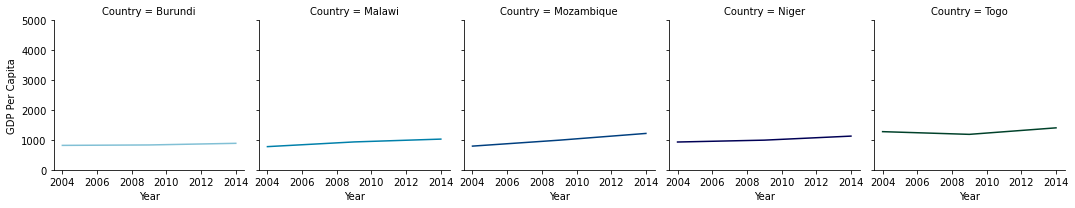

In [55]:
lg = sns.FacetGrid(lowest_5_gdp, col="Country", hue="Country", palette = 'ocean_r')
lg.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")
lg.set_axis_labels("Year", "GDP Per Capita")
lg.set(ylim=(0, 5000));

#### 30.	Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

In [56]:
whos% DataFrame

Variable               Type         Data/Info
---------------------------------------------
g_i_ltd_again          DataFrame              Country  Year  <...>n\n[482 rows x 4 columns]
gdp_and_internet_use   DataFrame              Country  Year  <...>\n[3458 rows x 4 columns]
gdp_df                 DataFrame              Country  Year  <...>\n[6868 rows x 3 columns]
gdp_internet_limited   DataFrame              Country  Year  <...>n\n[482 rows x 4 columns]
gdp_internet_ltd       DataFrame              Country  Year  <...>n\n[482 rows x 4 columns]
gi_2004                DataFrame              Country  Year  <...>n\n[157 rows x 4 columns]
gi_2009                DataFrame               Country  Year <...>n\n[162 rows x 4 columns]
gi_2014                DataFrame                 Country  Yea<...>n\n[163 rows x 4 columns]
internet_df            DataFrame              Country  Year  <...>\n[4495 rows x 3 columns]
lowest_5_gdp           DataFrame             Country  Year  G<...>76272         

In [57]:
pop_df = pd.read_csv('../data/population.csv', nrows = 11690)
pop_df

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Afghanistan,Total Population - Both sexes,2019,1000 persons,38042.0,NaN
1,Afghanistan,Total Population - Both sexes,2018,1000 persons,37172.0,NaN
2,Afghanistan,Total Population - Both sexes,2017,1000 persons,36296.0,NaN
3,Afghanistan,Total Population - Both sexes,2016,1000 persons,35383.0,NaN
4,Afghanistan,Total Population - Both sexes,2015,1000 persons,34414.0,NaN
...,...,...,...,...,...,...
11685,Zimbabwe,Total Population - Both sexes,1965,1000 persons,4422.0,NaN
11686,Zimbabwe,Total Population - Both sexes,1964,1000 persons,4280.0,NaN
11687,Zimbabwe,Total Population - Both sexes,1963,1000 persons,4141.0,NaN
11688,Zimbabwe,Total Population - Both sexes,1962,1000 persons,4006.0,NaN


In [58]:
pop_df.value_counts('Element')
#making sure nothing other than "Both sexes" is left

Element
Total Population - Both sexes    11690
dtype: int64

In [59]:
pop_df = pop_df.rename(columns = {'Country or Area' : 'Country',
                                  'Value' : 'Pop_in_thousands'})
pop_df = pop_df.drop(columns = ['Element', 'Unit', 'Value Footnotes'])
pop_df

,Country,Year,Pop_in_thousands
0,Afghanistan,2019,38042.0
1,Afghanistan,2018,37172.0
2,Afghanistan,2017,36296.0
3,Afghanistan,2016,35383.0
4,Afghanistan,2015,34414.0
...,...,...,...
11685,Zimbabwe,1965,4422.0
11686,Zimbabwe,1964,4280.0
11687,Zimbabwe,1963,4141.0
11688,Zimbabwe,1962,4006.0


In [60]:
pop_df.describe()

,Year,Pop_in_thousands
count,11690.000000,1.169000e+04
mean,1990.912831,1.300098e+05
std,17.071734,5.045898e+05
min,1961.000000,3.400000e+01
25%,1976.000000,2.189500e+03
50%,1992.000000,9.717000e+03
75%,2006.000000,4.280525e+04
max,2019.000000,7.652392e+06


In [61]:
pop_df.sort_values(by="Pop_in_thousands")

,Country,Year,Pop_in_thousands
5626,Kiribati,1961,34.00
6861,Micronesia,1961,34.00
5625,Kiribati,1962,35.00
6860,Micronesia,1962,35.00
6859,Micronesia,1963,36.00
...,...,...,...
11427,World,2015,7324467.93
11426,World,2016,7407700.98
11425,World,2017,7490611.22
11424,World,2018,7572929.33


In [62]:
d = {'United States of America' : 'United States'}
pop_df = pop_df.replace(d)

In [63]:
gdp_int_pop_ltd = pd.merge(gdp_internet_ltd, pop_df, on = ['Country', 'Year'])
gdp_int_pop_ltd

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_in_thousands
0,Afghanistan,2014,2102.385234,6.390000,33371.0
1,Afghanistan,2009,1758.904043,3.550000,27708.0
2,Afghanistan,2004,1200.278256,0.105809,24019.0
3,Albania,2014,11623.866679,60.100000,2896.0
4,Albania,2009,10346.864199,41.200000,3151.0
...,...,...,...,...,...
407,Zambia,2009,2917.516220,6.310000,12825.0
408,Zambia,2004,2261.766537,2.013550,11175.0
409,Zimbabwe,2014,2955.240287,19.890000,13587.0
410,Zimbabwe,2009,1925.364381,11.360000,12889.0


In [64]:
gdp_int_pop_ltd.sort_values(by="Pop_in_thousands")

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_in_thousands
46,Bermuda,2004,90195.811033,60.990867,64.0
45,Bermuda,2009,89961.982744,83.250000,65.0
103,Dominica,2004,10123.171191,30.319613,70.0
101,Dominica,2014,12217.562990,62.860000,71.0
102,Dominica,2009,11927.920544,42.020000,71.0
...,...,...,...,...,...
170,India,2009,3949.084821,5.120000,1190138.0
169,India,2014,5107.208153,18.000000,1295601.0
80,China,2004,4817.211845,7.300000,1340363.0
79,China,2009,8069.354638,28.900000,1381857.0


In [65]:
gdp_int_pop_ltd.tail(25)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_in_thousands
387,Uganda,2004,1436.709787,0.719971,27767.00
388,Ukraine,2014,12408.951598,43.400000,45112.00
389,Ukraine,2009,11298.390956,17.900000,46267.00
390,Ukraine,2004,10561.009526,3.489478,47450.00
391,United Arab Emirates,2014,62378.657439,90.400000,9214.17
392,United Arab Emirates,2009,58374.585844,64.000000,7718.00
393,United Arab Emirates,2004,97758.023345,30.131296,3659.00
394,United States,2014,57273.129074,87.360000,318673.00
395,United States,2009,53440.911538,71.000000,309492.00
396,United States,2004,53035.782913,64.758256,295487.00


In [66]:
gdp_int_pop_ltd.dtypes

Country                object
Year                    int64
GDP_Per_Capita        float64
Internet_Users_Pct    float64
Pop_in_thousands      float64
dtype: object

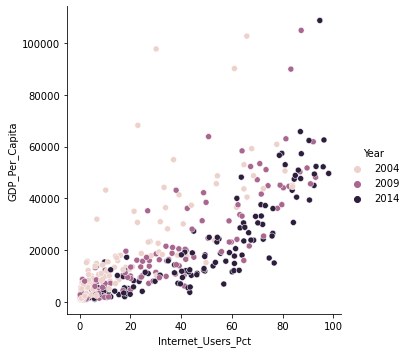

In [67]:
sns.relplot(data=gdp_int_pop_ltd, x="Internet_Users_Pct", y="GDP_Per_Capita", hue="Year");

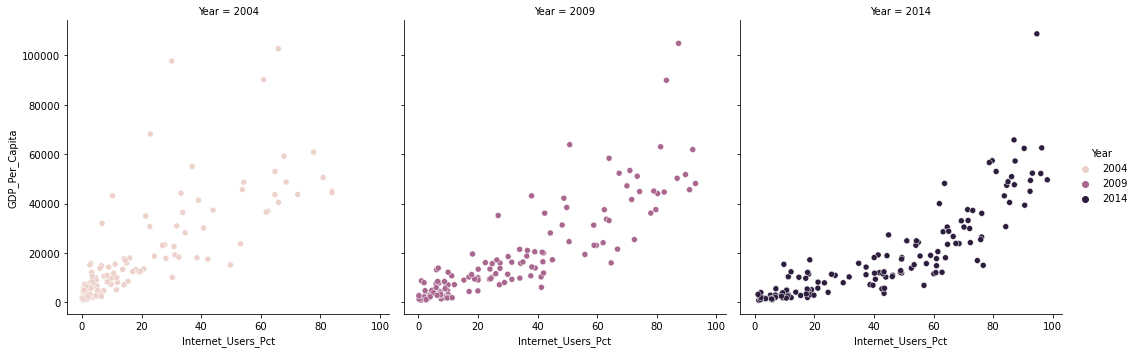

In [68]:
sns.relplot(data=gdp_int_pop_ltd, x="Internet_Users_Pct", y="GDP_Per_Capita", hue="Year", col="Year");

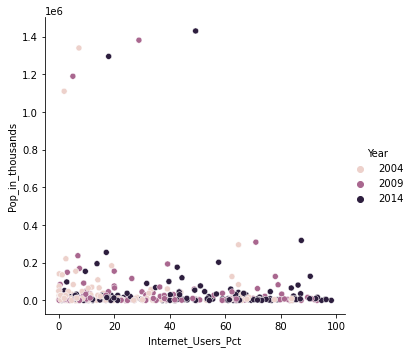

In [69]:
sns.relplot(data=gdp_int_pop_ltd, x="Internet_Users_Pct", y="Pop_in_thousands", hue="Year");

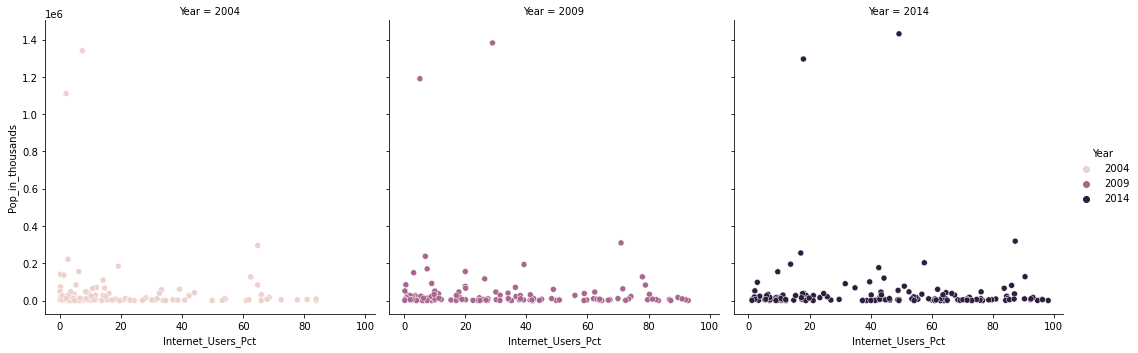

In [70]:
sns.relplot(data=gdp_int_pop_ltd, x="Internet_Users_Pct", y="Pop_in_thousands", hue="Year", col="Year");

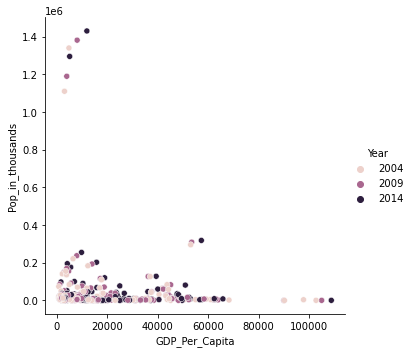

In [71]:
sns.relplot(data=gdp_int_pop_ltd, x="GDP_Per_Capita", y="Pop_in_thousands", hue="Year");

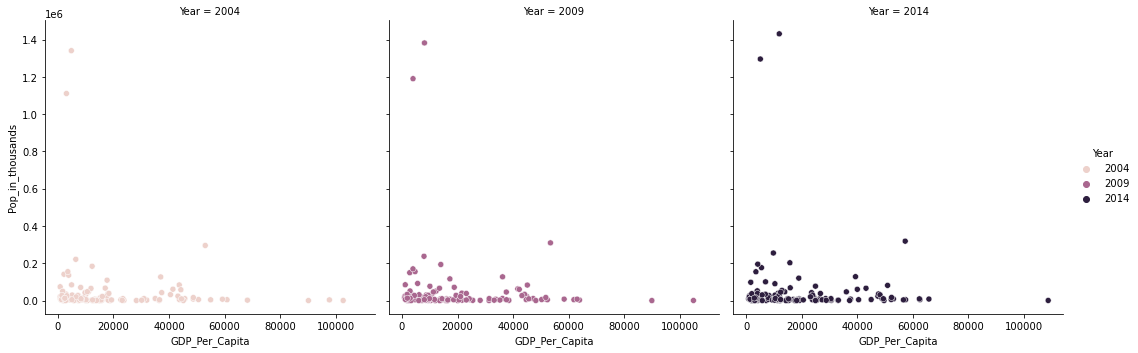

In [72]:
sns.relplot(data=gdp_int_pop_ltd, x="GDP_Per_Capita", y="Pop_in_thousands", hue="Year", col="Year");

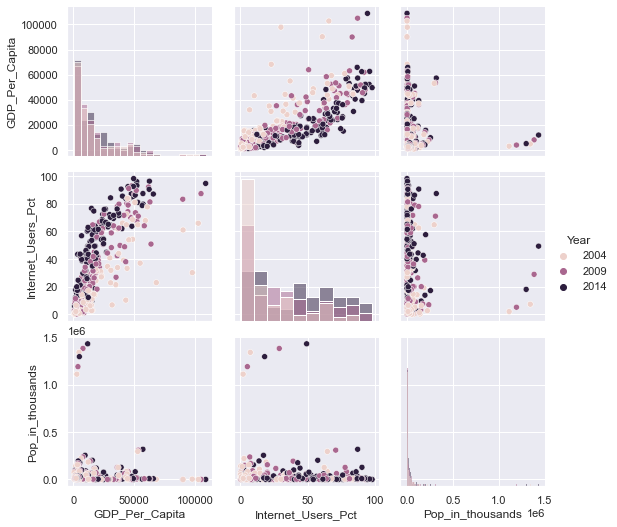

In [212]:
sns.set(font_scale=1)
g1 = sns.PairGrid(gdp_int_pop_ltd, hue="Year")
g1.map_diag(sns.histplot)
g1.map_offdiag(sns.scatterplot)
g1.add_legend()

In [74]:
giants = ["China", "India"]
gdp_int_pop_ltd_noci = gdp_int_pop_ltd.query("Country not in @giants")
gdp_int_pop_ltd_noci.sort_values(by="Pop_in_thousands")

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Pop_in_thousands
46,Bermuda,2004,90195.811033,60.990867,64.0
45,Bermuda,2009,89961.982744,83.250000,65.0
103,Dominica,2004,10123.171191,30.319613,70.0
101,Dominica,2014,12217.562990,62.860000,71.0
102,Dominica,2009,11927.920544,42.020000,71.0
...,...,...,...,...,...
173,Indonesia,2009,7906.261657,6.920000,237487.0
172,Indonesia,2014,9801.130633,17.140000,255128.0
396,United States,2004,53035.782913,64.758256,295487.0
395,United States,2009,53440.911538,71.000000,309492.0


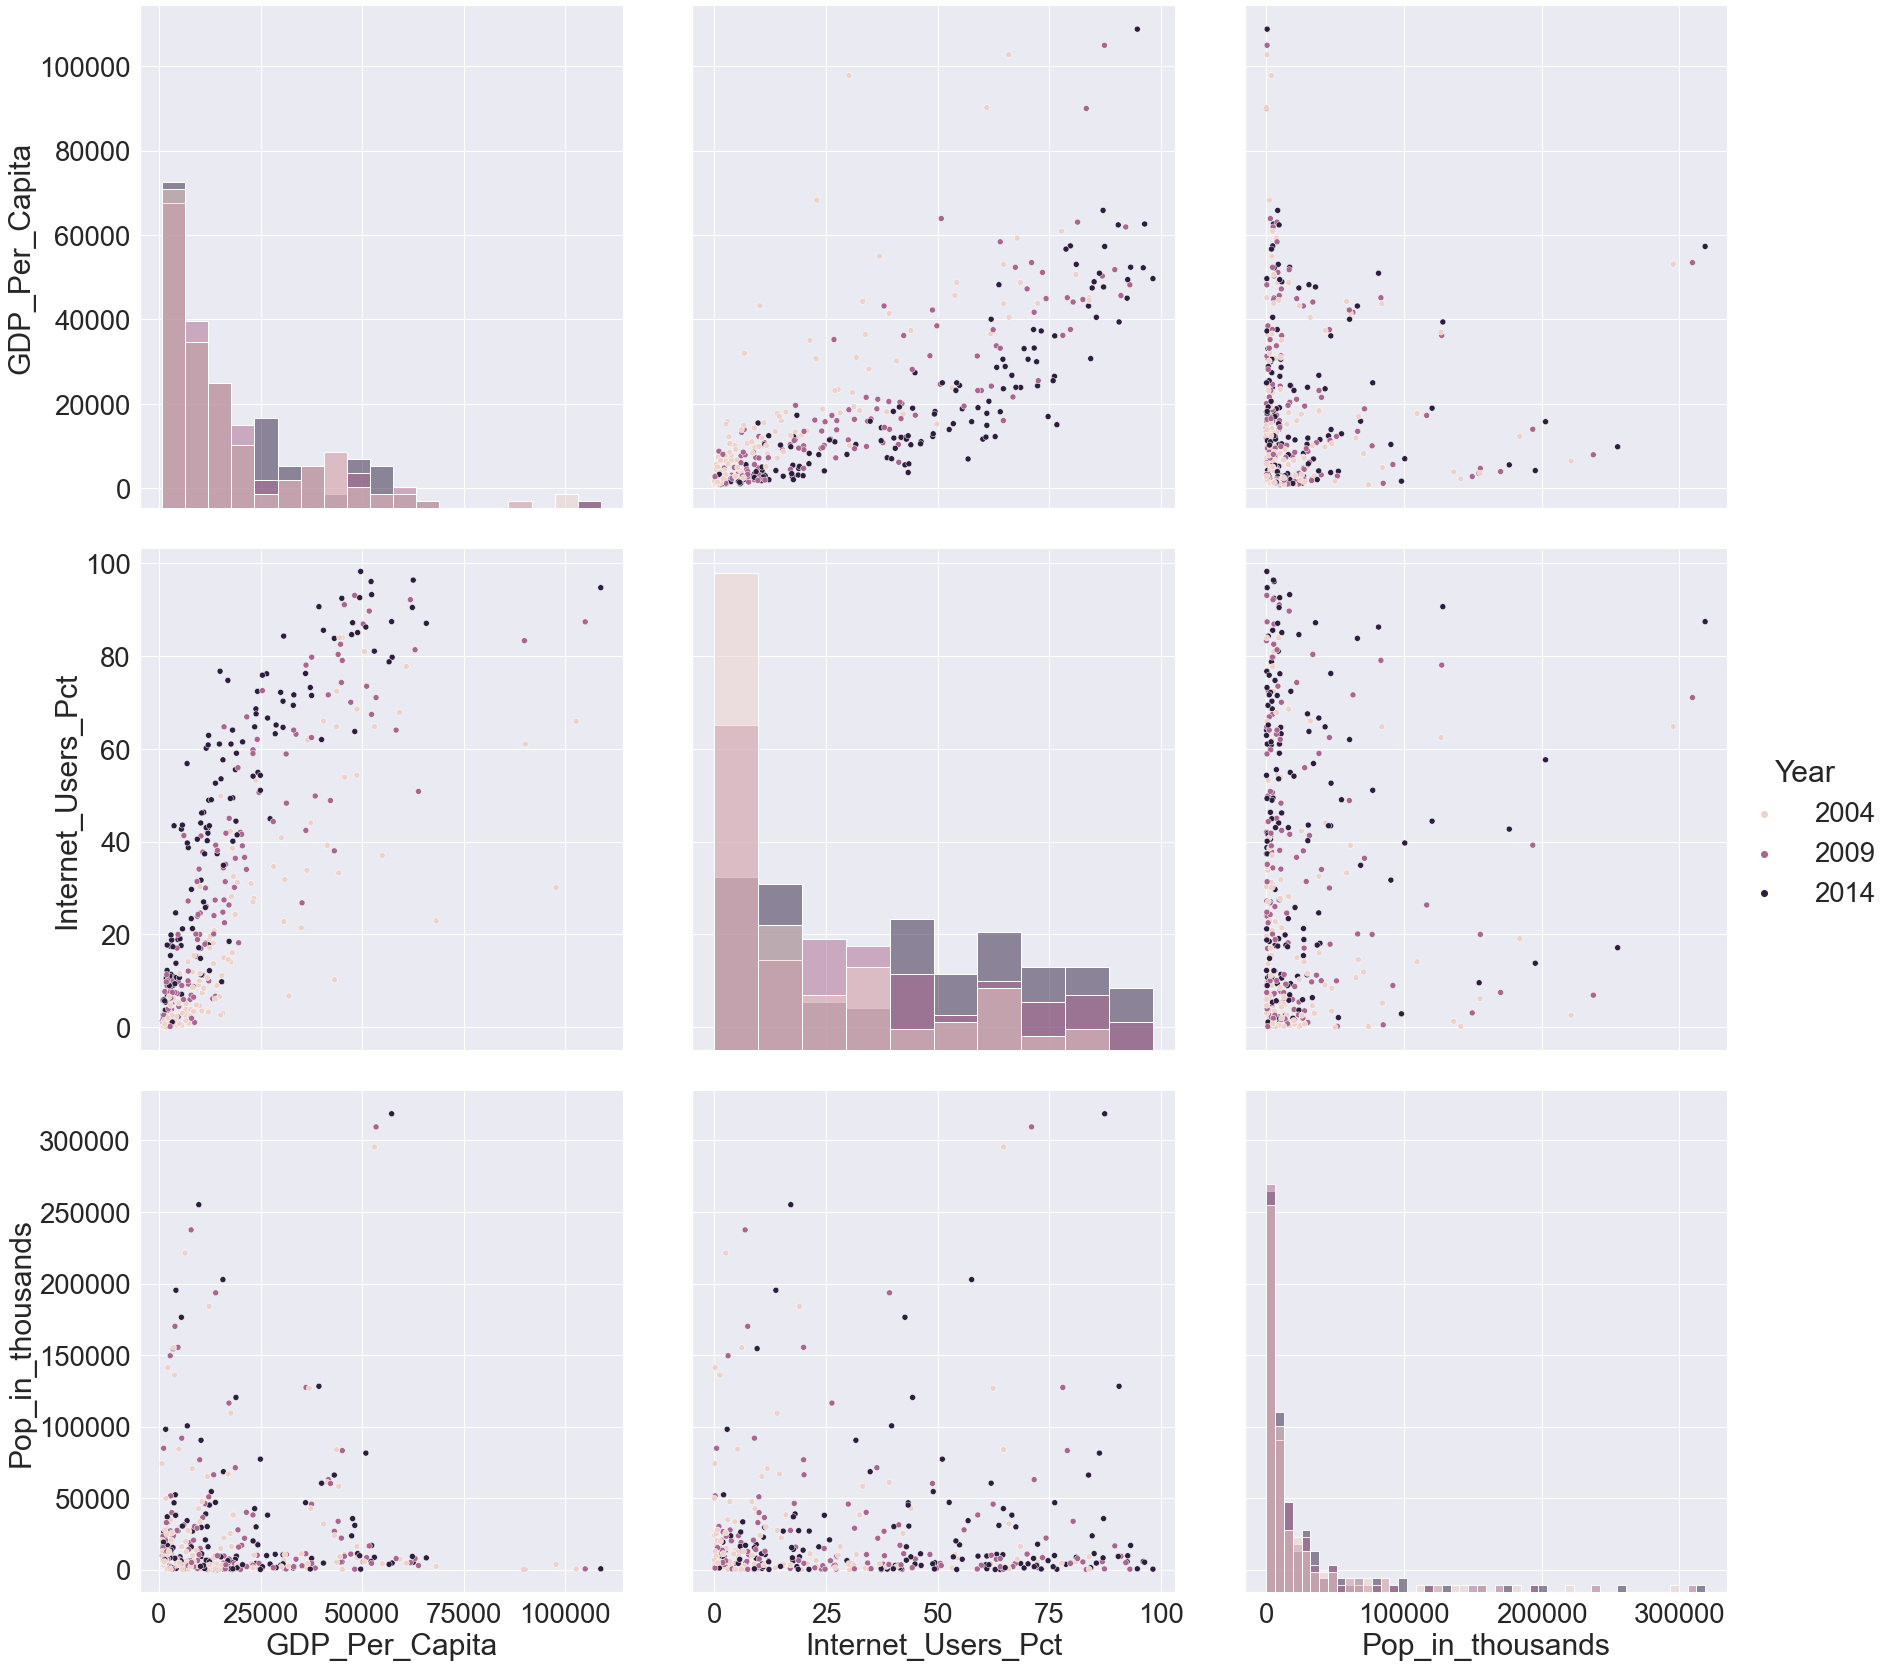

In [88]:
sns.set(font_scale=2.5)
pg = sns.PairGrid(gdp_int_pop_ltd_noci, hue="Year", height=8, aspect=8/8 )
pg.map_diag(sns.histplot)
pg.map_offdiag(sns.scatterplot)
pg.add_legend();

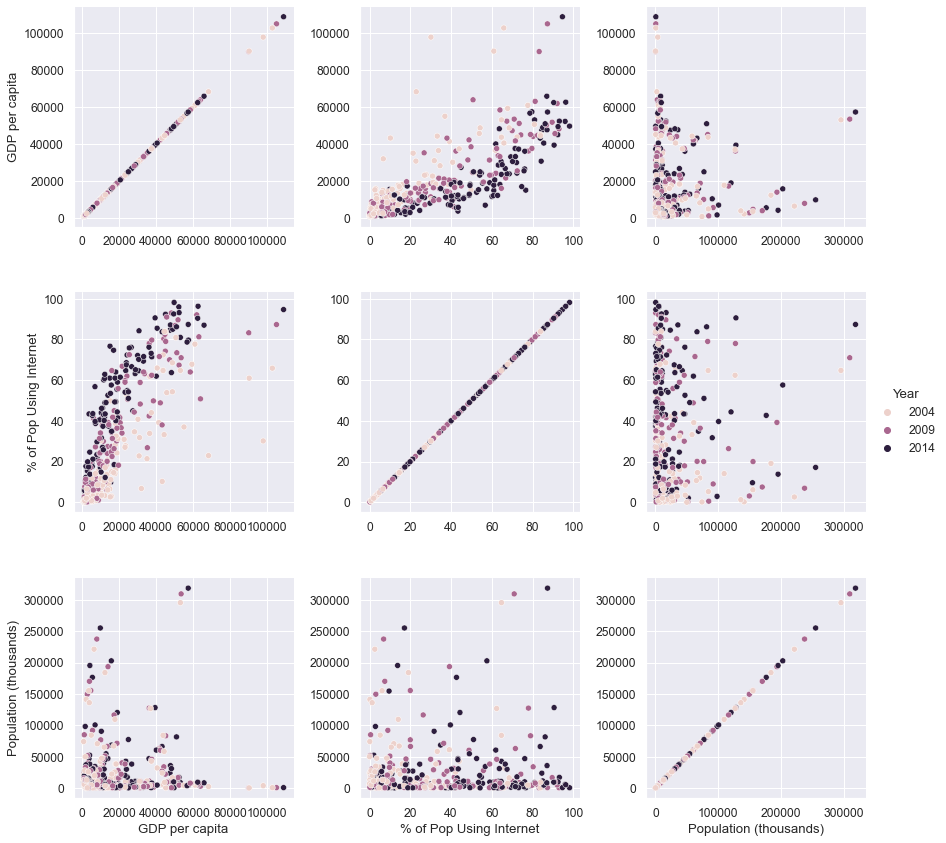

In [248]:
sns.set(font_scale=1.1)
pg3 = sns.PairGrid(gdp_int_pop_ltd_noci, hue="Year", height=4, aspect=1 )
pg3.map(sns.scatterplot)
pg3.axes[0, 0].yaxis.set_label_text('GDP per capita')
pg3.axes[1, 0].yaxis.set_label_text('% of Pop Using Internet')
pg3.axes[2, 0].yaxis.set_label_text('Population (thousands)')
pg3.axes[2, 0].xaxis.set_label_text('GDP per capita')
pg3.axes[2, 1].xaxis.set_label_text('% of Pop Using Internet')
pg3.axes[2, 2].xaxis.set_label_text('Population (thousands)')
pg3.add_legend()
for ax in pg3.axes.flat:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [249]:
pg3.axes
### I'm not understanding why I can't make labels show up on the other "inside" axes even when I try to do so directly

array([[<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='GDP per capita'>,
        <AxesSubplot:xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>,
        <AxesSubplot:xlabel='Pop_in_thousands', ylabel='GDP_Per_Capita'>],
       [<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='% of Pop Using Internet'>,
        <AxesSubplot:xlabel='Internet_Users_Pct', ylabel='Internet_Users_Pct'>,
        <AxesSubplot:xlabel='Pop_in_thousands', ylabel='Internet_Users_Pct'>],
       [<AxesSubplot:xlabel='GDP per capita', ylabel='Population (thousands)'>,
        <AxesSubplot:xlabel='% of Pop Using Internet', ylabel='Pop_in_thousands'>,
        <AxesSubplot:xlabel='Population (thousands)', ylabel='Pop_in_thousands'>]],
      dtype=object)

In [ ]:
urru_df = pd.read_csv('../data/urban_rural.csv', nrows = 68515)
urru_df

In [ ]:
urru_df = urru_df.drop(columns = ["Record Type", "Reliability", "Source Year", "Value Footnotes"])
urru_df = urru_df.rename(columns = {"Country or Area" : "Country",
                                    "Source Year" : "Year",
                                    "Value": "Area_Pop"})
urru_df

In [ ]:
urru_bs_df = urru_df.loc[urru_df["Sex"] == "Both Sexes"]
urru_bs_df = urru_bs_df.drop(columns = ["Sex"])
urru_bs_df

In [ ]:
urban_bs_df = urru_bs_df.loc[urru_bs_df["Area"] == "Urban"]
urban_bs_df = urban_bs_df.rename(columns = {"Area_Pop" : "Urban_Pop"})
urban_bs_df = urban_bs_df.drop(columns = ["Area"])
urban_bs_df = urban_bs_df.reset_index(drop=True)
urban_bs_df

In [ ]:
rural_bs_df = urru_bs_df.loc[urru_bs_df["Area"] == "Rural"]
rural_bs_df = rural_bs_df.rename(columns = {"Area_Pop" : "Rural_Pop"})
rural_bs_df = rural_bs_df.drop(columns = "Area")
rural_bs_df = rural_bs_df.reset_index(drop=True)
rural_bs_df

In [ ]:
total_bs_df = urru_bs_df.loc[urru_bs_df["Area"] == "Total"]
total_bs_df = total_bs_df.rename(columns = {"Area_Pop" : "Total_Pop"})
total_bs_df = total_bs_df.drop(columns = "Area")
total_bs_df = total_bs_df.reset_index(drop=True)
total_bs_df

In [ ]:
urru_col = pd.concat([rural_bs_df, urban_bs_df, total_bs_df], axis=1)
urru_col

I saw the above referenced in stack overflow when I searched for how to combind more than 2 dataframes at once. I realize in retrospect that this could have worked If I'd renamed the country and year columns for each of my split out tables, then I could have dropped the repeats. I'm going to try a merge option I read about next.

In [ ]:
from functools import reduce

In [ ]:
urru_merge = reduce(lambda left, right:
                    pd.merge(left, right,
                             on = ["Country", "Year"]),
                    [rural_bs_df, urban_bs_df, total_bs_df])
urru_merge

In [ ]:
urru_merge["Pct_Rural"] = (urru_merge["Rural_Pop"]/urru_merge["Total_Pop"])*100
urru_merge.head()

In [ ]:
urru_merge["Pct_Urban"] = (urru_merge["Urban_Pop"]/urru_merge["Total_Pop"])*100
urru_merge.head()

In [ ]:
urru_merge = urru_merge.round({"Pct_Rural" : 2 , "Pct_Urban" : 2})

In [ ]:
urru_merge

In [ ]:
urru_merge.query("Pct_Rural >= 100")

In [ ]:
urru_merge.query("Pct_Urban >= 100")

In [ ]:
urru_merge.query("Pct_Rural+Pct_Urban != 100")